In [32]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from scipy import stats

In [33]:
other_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"
df = pd.read_csv(other_path, header = None)
pd.set_option('display.max_columns', None)

In [34]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [35]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df.columns = headers

In [36]:
df.replace('?',np.NaN, inplace = True)
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,NaN


DATA PRE-PROCESSING

Missing values  
Data Formatting  
Data Normalization (centering / scaling)  
Data Binning  
Turning categorial vars into numeric


In [37]:
# Evaluating for Missing Data
# There are two methods to detect missing data:

# .isnull()
# .notnull()

missings = df.isnull()
missings

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
201,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
202,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
203,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [38]:
# Count missings

for column in missings.columns.values.tolist():
    print(column)
    print (missings[column].value_counts())
    print("")

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

In [39]:
# Replace by mean:

# "normalized-losses"
# "stroke"
# "bore"
# "horsepower"
# "peak-rpm"

# Replace by frequency:

# "num-of-doors": 2 missing data, replace them with "four".
# Reason: 84% sedans is four doors. Since four doors is most frequent, it is most likely to occur

# Drop the whole row:

# "price"
# Reason: price is what we want to predict.
#     Any data entry without price data cannot be used for prediction; 
#     therefore any row now without price data is not useful to us

In [40]:
# replace Nan in normalized-losses with a mean
mean_nl = df["normalized-losses"].astype("float").mean(axis = 0)
df['normalized-losses'].replace(np.nan, mean_nl, inplace = True)

In [41]:
mean_stroke = df['stroke'].astype('float').mean()
df['stroke'].replace(np.nan, mean_stroke, inplace = True)

In [42]:
mean_bore = df['bore'].astype('float').mean()
df['bore'].replace(np.nan, mean_bore, inplace = True)

In [43]:
mean_hrpwr = df["horsepower"].astype('float').mean()
df["horsepower"].replace(np.nan, mean_hrpwr, inplace = True)

In [44]:
mean_peak = df["peak-rpm"].astype('float').mean()
df["peak-rpm"].replace(np.nan, mean_peak, inplace = True)

In [45]:
df['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [46]:
df["num-of-doors"].replace(np.nan, "four", inplace = True)

In [47]:
#drop whole row with NaN in "price" column
df.dropna(subset = ["price"], axis = 0, inplace = True)

# reset index, because we droped two rows
df.reset_index(drop = True, inplace = True)

In [48]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [49]:
# Data Formatting

# convert 'mpg' to 'L/100km'
df['city-mpg'] = round((235 / df['city-mpg']), 2)
df.rename(columns = {'city-mpg': 'city-L/100km'}, inplace = True)

In [50]:
df["highway-mpg"] = 235 / df["highway-mpg"]

# rename column name from "highway-mpg" to "highway-L/100km"
df.rename(columns = {'highway-mpg':'highway-L/100km'}, inplace = True)

# check your transformed data 
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,11.19,8.703704,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,11.19,8.703704,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,12.37,9.038462,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,9.79,7.833333,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,13.06,10.681818,17450


In [51]:
# Converting dtypes
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-L/100km         float64
highway-L/100km      float64
price                 object
dtype: object

In [54]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

In [55]:
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-L/100km         float64
highway-L/100km      float64
price                float64
dtype: object

Data Normalization (centering / scaling)

1. Simple Feature scaling 
2. Min-Max  
3. Z-score  

In [23]:
# Normalizing horsepower

# Simple Feature scaling:
    
# df['hpwr_simple_feat'] = round(df['horsepower'] / df['horsepower'].max(), 4)

In [24]:
# Min-Max

# df['hpwr_minmax'] = round((df['horsepower'] - df['horsepower'].min()) / (df['horsepower'].max() - df['horsepower'].min()), 4)

In [25]:
# 3.Z-score

# df['hpwr_Zscore'] = round((df['horsepower'] - df['horsepower'].mean()) / df['horsepower'].std(), 4)

In [56]:
# Data Normalization

df['length'] = df['length'] / df['length'].max()
df['width'] = df['width'] / df['width'].max()
df['height'] = df['height'] / df['height'].max()

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,11.19,8.703704,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,11.19,8.703704,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.876254,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,12.37,9.038462,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,0.848630,0.919444,0.908027,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,9.79,7.833333,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,0.848630,0.922222,0.908027,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,13.06,10.681818,17450.0


Binning
* helps to improve accuracy of models

Grouping values into bins  
Convert numeric into categorial vars

In [ ]:
# In our dataset, "horsepower" is a real valued variable ranging from 48 to 288 and it has 59 unique values. 
# What if we only care about the price difference between cars with high horsepower, 
# medium horsepower, and little horsepower (3 types)? Can we rearrange them into three ‘bins' 
# to simplify analysis?

# We will use the pandas method 'cut' to segment the 'horsepower' column into 3 bins.

Text(0.5, 1.0, 'horsepower bins')

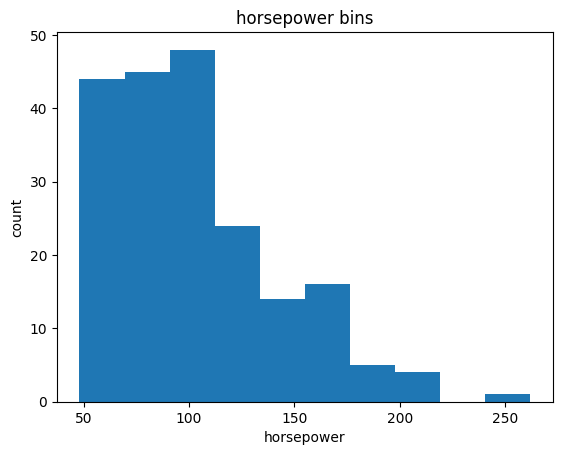

In [57]:
df["horsepower"] = df["horsepower"].astype(int, copy = True)
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

plt.pyplot.hist(df["horsepower"])

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

In [59]:
# We build a bin array with a minimum value to a maximum value by using the bandwidth calculated above.
# The values will determine when one bin ends and another begins.

bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)

In [60]:
group_names = ['Low', 'Medium', 'High']

In [61]:
# We apply "cut" to determine what each value of df['horsepower'] belongs to.

df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels = group_names, include_lowest = True )
df[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,101,Low


In [62]:
df["horsepower-binned"].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

Text(0.5, 1.0, 'horsepower bins')

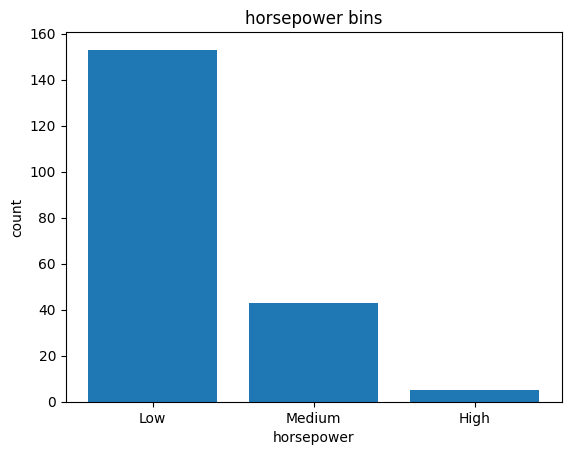

In [63]:
# Let's plot the distribution of each bin:

%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

Text(0.5, 1.0, 'horsepower bins')

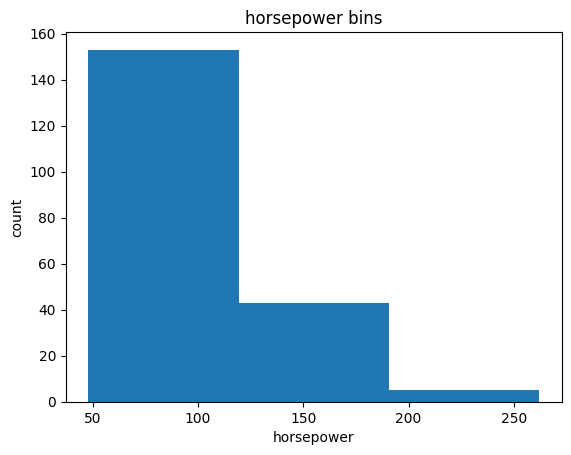

In [64]:
# Normally, a histogram is used to visualize the distribution of bins we created above.
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df["horsepower"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")
# The plot above shows the binning result for the attribute "horsepower".

Turning categorial vars into numeric

Most stat models can't use obj\strings as input - numerics only  
One-hot encoding

fuel-type    Categorial -> Numeric  
divide into 2 dummies: gas, diesel

In [65]:
dummy_variable_1 = pd.get_dummies(df['fuel-type'])

In [66]:
# Change the column names for clarity:

dummy_variable_1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace = True)
dummy_variable_1.head()

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [67]:
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis = 1)

# drop original column "fuel-type" from "df"
df.drop("fuel-type", axis = 1, inplace = True)

In [68]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,11.19,8.703704,13495.0,Low,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,11.19,8.703704,16500.0,Low,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.876254,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,12.37,9.038462,16500.0,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,0.908027,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,9.79,7.833333,13950.0,Low,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,0.908027,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,13.06,10.681818,17450.0,Low,0,1


In [69]:
# get indicator variables of aspiration and assign it to data frame "dummy_variable_2"
dummy_variable_2 = pd.get_dummies(df['aspiration'])

# change column names for clarity
dummy_variable_2.rename(columns = {'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace = True)

# show first 5 instances of data frame "dummy_variable_1"
dummy_variable_2.head()

,aspiration-std,aspiration-turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [70]:
# merge the new dataframe to the original datafram
df = pd.concat([df, dummy_variable_2], axis = 1)

# drop original column "aspiration" from "df"
df.drop('aspiration', axis = 1, inplace = True)

In [71]:
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,11.19,8.703704,13495.0,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,11.19,8.703704,16500.0,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.876254,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,12.37,9.038462,16500.0,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,0.908027,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,9.79,7.833333,13950.0,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,0.908027,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,13.06,10.681818,17450.0,Low,0,1,1,0


In [72]:
df.to_csv('clean_df.csv')

EXPLONATORY DATA ANALYSIS

DESCRIPTIVE STATS

df.describe()  
value_counts() - for categorial  
box plots  
scatter plot - dependency btw two vars

In [140]:
df.describe()
df.describe(include=['object'])

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,201,201,201,201,201,201,201,201
unique,22,2,5,3,2,6,7,8
top,toyota,four,sedan,fwd,front,ohc,four,mpfi
freq,32,115,94,118,198,145,157,92


value_counts()

Value counts is a good way of understanding how many units of each characteristic/variable we have. The method "value_counts" only works on pandas series, not pandas dataframes. As a result, we only include one bracket df['drive-wheels'], not two brackets df[['drive-wheels']].

In [73]:
df['drive-wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

In [74]:
# We can convert the series to a dataframe as follows:
df['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,75
4wd,8


In [143]:
# engine-location as variable

engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns = {'engine-location': 'value_counts'}, inplace = True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

# After examining the value counts of the engine location, we see that engine location
# would not be a good predictor variable for the price. This is because we only have 
# three cars with a rear engine and 198 with an engine in the front, so this result is skewed. 
# Thus, we are not able to draw any conclusions about the engine location.

,value_counts
engine-location,
front,198
rear,3


<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

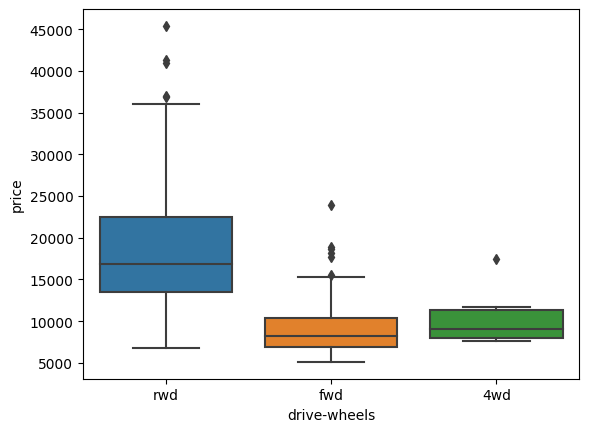

In [75]:
import seaborn as sns
sns.boxplot(x = 'drive-wheels', y = 'price', data = df)

Text(0, 0.5, 'Price')

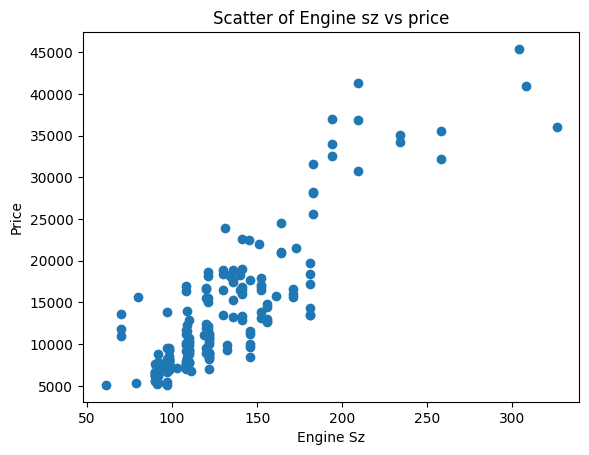

In [76]:
import matplotlib.pyplot as plt
y = df['price']
x = df['engine-size']
plt.scatter(x,y)

plt.title('Scatter of Engine sz vs price')
plt.xlabel('Engine Sz')
plt.ylabel('Price')

GROUPING DATA

1. groupby
2. pivot
3. heatmap

In [77]:
df_test = df[['drive-wheels', 'body-style', 'price']]
df_drp = df_test.groupby(['drive-wheels', 'body-style'], as_index = False).mean()
df_drp

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [78]:
df_pivot = df_drp.pivot(index = 'drive-wheels', columns = 'body-style')
df_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

CORRELATION



Continuous Numerical Variables:
    
Continuous numerical variables are variables that may contain any value within some range. 
They can be of type "int64" or "float64". A great way to visualize these variables is 
by using scatterplots with fitted lines.
 
we can use "regplot" which plots the scatterplot plus the fitted regression line for the data. 
This will be useful later on for visualizing the fit of the simple linear regression model as well.

(0.0, 53424.19388469832)

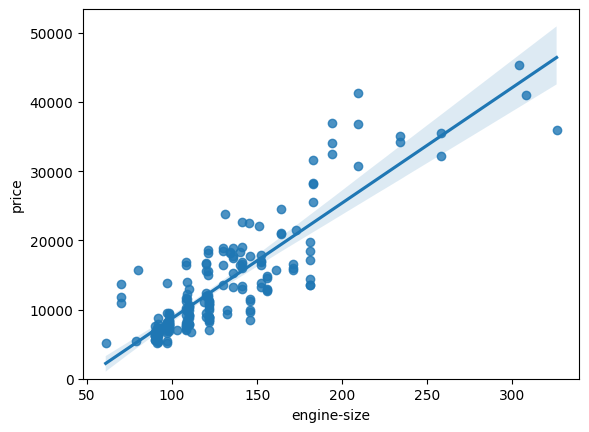

In [79]:
# Correlation btw 'price' and 'engine-size'

sns.regplot(x = 'engine-size', y = 'price', data = df)
plt.ylim(0, )

# strong positive linear correlation
# Engine size seems a good predictor since the regression line is almost a perfect diagonal line.

In [80]:
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


Highway mpg is a potential predictor variable of price. 
Let's find the scatterplot of "highway-mpg" and "price".


<AxesSubplot:xlabel='highway-L/100km', ylabel='price'>

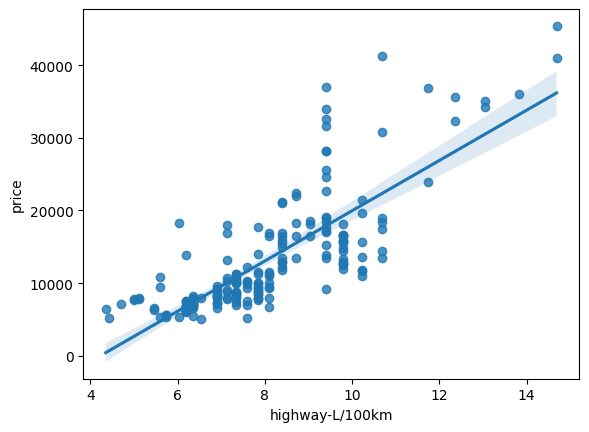

In [82]:
sns.regplot(x = "highway-L/100km", y = "price", data = df)

In [84]:
df[['highway-L/100km', 'price']].corr()
# good predictor

,highway-L/100km,price
highway-L/100km,1.000000,0.801118
price,0.801118,1.000000


(0.0, 47414.1)

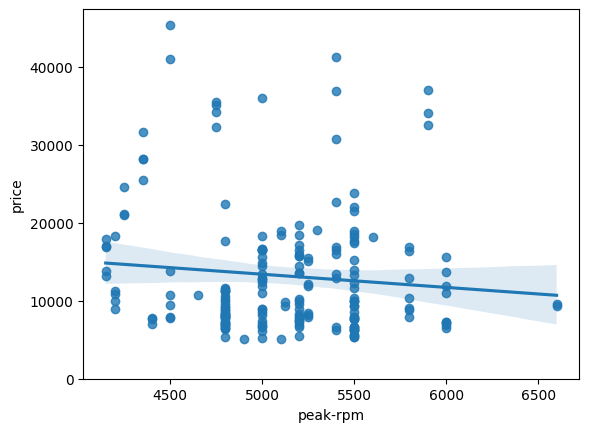

In [85]:
sns.regplot(x = 'peak-rpm', y = 'price', data = df)
plt.ylim(0, )

# bad predictor

In [86]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


"stroke" is a potential predictor variable of price. 
Let's find the scatterplot of "stroke" and "price".

<AxesSubplot:xlabel='stroke', ylabel='price'>

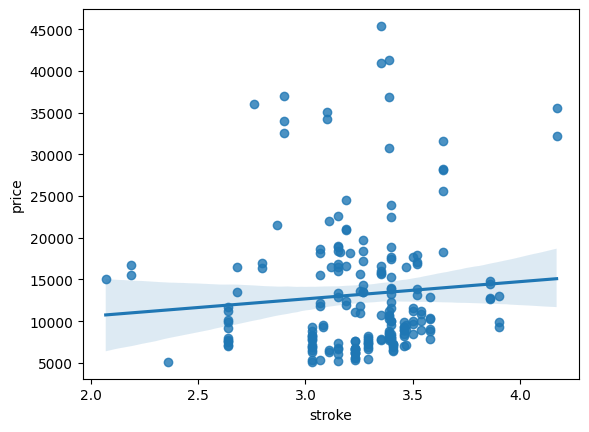

In [87]:
sns.regplot(x = "stroke", y = 'price', data = df)

In [88]:
df[["stroke", 'price']].corr()

# weak correlation

,stroke,price
stroke,1.000000,0.082269
price,0.082269,1.000000


CATEGORIAL VARIABLES

These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64". 

A good way to visualize categorical variables is by using boxplots.

<AxesSubplot:xlabel='body-style', ylabel='price'>

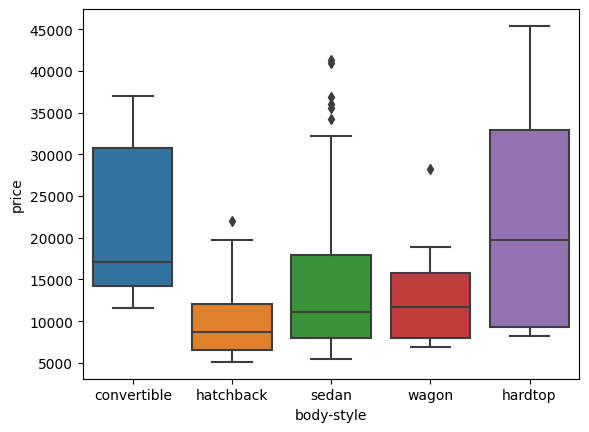

In [89]:
# relationship between "body-style" and "price"

sns.boxplot(x = "body-style", y = "price", data = df)

# We see that the distributions of price between the different body-style categories have 
# a significant overlap, so body-style would not be a good predictor of price.


<AxesSubplot:xlabel='engine-location', ylabel='price'>

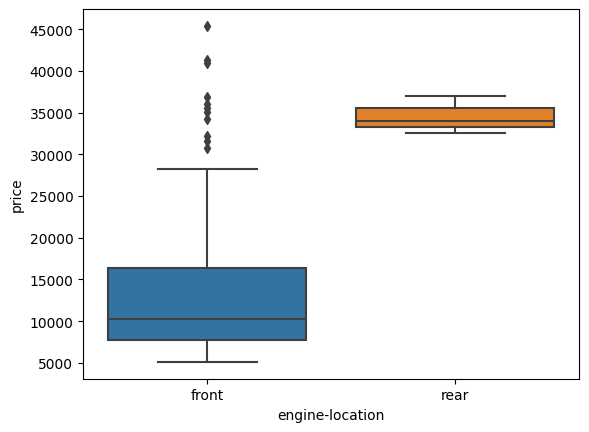

In [90]:
# Let's examine engine "engine-location" and "price":

sns.boxplot(x = "engine-location", y = "price", data = df)

# Here we see that the distribution of price between these two engine-location categories, 
# front and rear, are too distinct to take engine-location as a potential good predictor of price.

<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

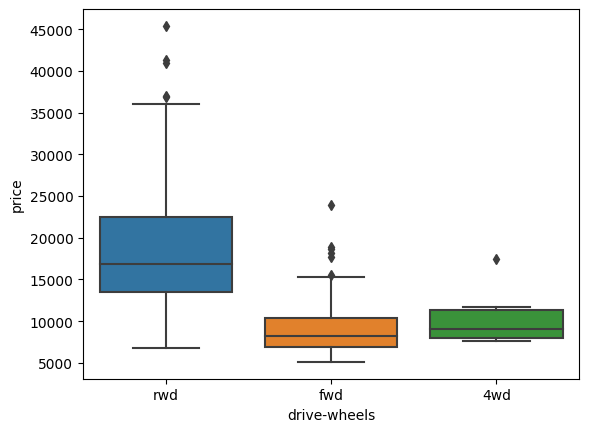

In [91]:
# Let's examine "drive-wheels" and "price".

sns.boxplot(x = "drive-wheels", y = "price", data = df)
# Here we see that the distribution of price between the different drive-wheels categories differs. 
# As such, drive-wheels could potentially be a predictor of price.

Pearson Correlation

* Correlation coefficient
     1. +1: largw positive correlation
     2. -1^ large negative correlatin
     3. 0: no relationship
* P-value
     1. P-value < 0.01 Strong certanty in the res
     2. P-value < 0.05 Moderate cert in the res
     3. P-value < 0.1 Weak cert in the res
     4. P-value > 0.1 No certanty
     
     the less, the better


In [92]:
# Pearson Correlation btw horsepower, price 

from scipy import stats
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])

In [93]:
pearson_coef, p_value
# Since the p-value is  <  0.001, the correlation between horsepower and price is statistically significant, 
# and the linear relationship is quite strong (~0.809, close to 1).

(0.8096068016571054, 6.273536270650504e-48)

In [ ]:
# Wheel-Base vs. Price
# Let's calculate the Pearson Correlation Coefficient and P-value of 'wheel-base' and 'price'.

In [94]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
pearson_coef, p_value

# Since the p-value is  <  0.001, the correlation between wheel-base and price is statistically significant,
# although the linear relationship isn't extremely strong (~0.585).

(0.584641822265508, 8.076488270733218e-20)

In [95]:
# Length vs. Price
# Let's calculate the Pearson Correlation Coefficient and P-value of 'length' and 'price'.

pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
pearson_coef, p_value

# Since the p-value is  <  0.001, the correlation between length and price 
# is statistically significant, and the linear relationship is moderately strong (~0.691).

(0.6906283804483639, 8.016477466159328e-30)

In [147]:
# Width vs. Price

pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
pearson_coef,  p_value

# Since the p-value is < 0.001, the correlation between width and price is statistically significant, 
# and the linear relationship is quite strong (~0.751).

(0.7512653440522672, 9.20033551048217e-38)

In [96]:
# Curb-Weight vs. Price

pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
pearson_coef,p_value

# Since the p-value is  <  0.001, the correlation between curb-weight and price is statistically significant,
# and the linear relationship is quite strong (~0.834).

(0.8344145257702843, 2.189577238894065e-53)

In [97]:
# Engine-Size vs. Price

pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
pearson_coef, p_value

# Since the p-value is  <  0.001, the correlation between engine-size and price is statistically significant,
# and the linear relationship is very strong (~0.872).

(0.8723351674455182, 9.265491622200232e-64)

In [98]:
# Bore vs. Price

pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
pearson_coef, p_value

# Since the p-value is  <  0.001, the correlation between bore and price is statistically significant, 
# but the linear relationship is only moderate (~0.521).

(0.5431553832626603, 8.049189483935261e-17)

In [99]:
# city-L/100km vs. Price
pearson_coef, p_value = stats.pearsonr(df['city-L/100km'], df['price'])
pearson_coef, p_value

# Since the p-value is  > 0.001, the correlation between highway-mpg and price is statistically significant,

(0.7899173587120637, 3.8707665631722197e-44)

In [101]:
# Highway-mpg vs. Price
pearson_coef, p_value = stats.pearsonr(df['highway-L/100km'], df['price'])
pearson_coef, p_value

# Since the p-value is > 0.001, the correlation between highway-mpg and price is statistically significant,
# and the coefficient of about -0.705 shows that the relationship is negative and moderately strong.

(0.8011176263981973, 3.0467845810415427e-46)

Analysis of Variance (ANOVA)  
Дисперсионный анализ:

* finding correlation btw different groups of categorial vars
* F-tes, p-value

If our price variable is strongly correlated with the variable we are analyzing, we expect ANOVA to return a sizeable F-test score and a small p-value.

Since ANOVA analyzes the difference between different groups of the same variable, 
the groupby function will come in handy. 

To see if different types of 'drive-wheels' impact 'price', we group the data.

In [102]:
df_gptest = df[['drive-wheels','body-style','price']]

# To see if different types of 'drive-wheels' impact 'price', we group the data.

grouped_test2 = df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test2.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
136,4wd,7603.0


In [103]:
# We can use the function 'f_oneway' in the module 'stats' to obtain the F-test score and P-value.

f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], \
                              grouped_test2.get_group('rwd')['price'], \
                              grouped_test2.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val) 


ANOVA results: F= 67.95406500780399 , P = 3.3945443577151245e-23


This is a great result with a large F-test score showing a strong correlation and a P-value of almost 0 implying almost certain statistical significance. But does this mean all three tested groups are all this highly correlated?

Let's examine them separately.

In [104]:
# fwd and rwd
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], \
                              grouped_test2.get_group('rwd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 130.5533160959111 , P = 2.2355306355677845e-23


In [105]:
# 4wd and rwd
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], \
                              grouped_test2.get_group('rwd')['price'])  
   
print( "ANOVA results: F=", f_val, ", P =", p_val) 

ANOVA results: F= 8.580681368924756 , P = 0.004411492211225333


In [106]:
# 4wd and fwd
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], \
                              grouped_test2.get_group('fwd')['price'])  
 
print("ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 0.665465750252303 , P = 0.41620116697845666


We notice that ANOVA for the categories 4wd and fwd yields a high p-value > 0.1, so the calculated F-test score is not very statistically significant. 

This suggests we can't reject the assumption that the means of these two groups are the same, or, in other words, we can't conclude the difference in correlation to be significant.

Conclusion: Important Variables  
We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:

Continuous numerical variables:

* Length
* Width
* Curb-weight
* Engine-size
* Horsepower
* City-mpg
* Highway-mpg
* Wheel-base
* Bore


Categorical variables:

* Drive-wheels


1. Linear Regression and Multiple Linear Regression

LINEAR REGRESSION

In [130]:
# loading necessary libraries

from sklearn.linear_model import LinearRegression

In [131]:
# Create the linear regression object:
lm = LinearRegression()
lm

LinearRegression()

In [132]:
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,11.19,8.703704,13495.0,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,11.19,8.703704,16500.0,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.876254,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,12.37,9.038462,16500.0,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,0.908027,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,9.79,7.833333,13950.0,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,0.908027,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,13.06,10.681818,17450.0,Low,0,1,1,0


Using simple linear regression, we will create a linear function with "highway-L/100km" 
as the predictor variable and the "price" as the response variable.

In [133]:
X = df[['highway-L/100km']]
Y = df['price']

In [134]:
# Fit the linear model using highway-L/100km:

lm.fit(X, Y)

LinearRegression()

In [135]:
# We can output a prediction:

Yhat = lm.predict(X)
Yhat[0:13]

array([15485.52737455, 15485.52737455, 16643.34931414, 12475.19033163,
       22327.2024721 , 17893.79700889, 17893.79700889, 17893.79700889,
       26021.70702478, 13409.43286219, 13409.43286219, 14410.40700208,
       14410.40700208])

In [136]:
# intercept 
lm.intercept_

-14617.843054664598

In [137]:
# slope 
lm.coef_

array([3458.68511314])

Plugging in the actual values we get:  

Price = 38423.31 - 821.73 x highway-L/100km

MULTIPLE LINEAR REGRESSION

We've already explored that good predictors of price could be:

* Horsepower
* Curb-weight
* Engine-size
* highway-L/100km

Let's develop a model using these variables as the predictor variables.

In [139]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km']]

In [140]:
lm.fit(Z, df['price'])

LinearRegression()

In [141]:
lm.intercept_

-14385.634549360093

In [142]:
lm.coef_

array([ 36.6377371 ,   3.50038215,  85.37370862, 500.51979785])

2. Model Evaluation Using Visualization